# <u> <b> LDA Topic Modelling 

### 1. Loading and Cleaning of Data

In [1]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv(r'C:\Users\damar\Desktop\redditdataset.csv')
# Print head
papers.head()

,score,id,ups,downs,num_comments,permalink,text,link_flair_text,edited,name
0,102892,1464ghff,7994600,131,1002,http://www.reddit.com,It was so nice throwing big parties taylor swi...,NO,1611870579,t3_1hxdkd
1,9552,84gfghfg,3564,65,1558,http://www.reddit.com,This post goes way in depth to Prometheus and ...,NO,1611870579,t3_1bn9h4
2,8921,943hgjg,8644,58,466,http://www.reddit.com,Life isn't fair. My mother always told me that...,NO,1611870579,t3_1kakz
3,65646,686gfhgf,7982,69,8552,http://www.reddit.com,I was the lucky one in my family. In 2008 I w...,YES,1611870579,t3_1bn9h4
4,9641,93hgh,3356,38,4522,http://www.reddit.com,Three Idiots’ is a remarkable ahead of its tim...,Explained,1611870579,t3_16rnfn


In [2]:
# Remove the columns
papers = papers.drop(columns=['ups','downs','num_comments','permalink','link_flair_text','edited','name'], axis=1).sample(10)
# Print out the first rows of papers
papers.head()

,score,id,text
18,1239,0140yu,"Hey guys, I just want to start out by saying t..."
3,65646,686gfhgf,I was the lucky one in my family. In 2008 I w...
15,2049,1h1a2l,"I'm not sure which 2 states allow the sales, ..."
11,7743,369ffg,About a month ago ago I decided I wanted to cl...
16,8520,300po,Suppose all fellow retard shareholders of GME ...


In [3]:
# Load the regular expression library
import re
# Remove punctuation
papers['text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['text_processed'] = \
papers['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['text_processed'].head()

18    hey guys i just want to start out by saying th...
3     i was the lucky one in my family  in 2008 i wa...
15     i'm not sure which 2 states allow the sales i...
11    about a month ago ago i decided i wanted to cl...
16    suppose all fellow retard shareholders of gme ...
Name: text_processed, dtype: object

### 2. Exploratory Analysis

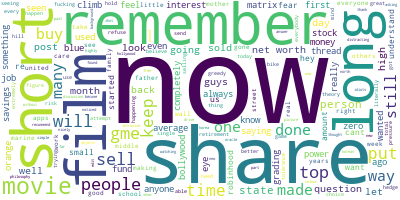

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000,
contour_width=5, contour_color='red')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### 3. Preparation for LDA Modelling

In [5]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'is', 'are', 'they', 'am','us','i','you','https','the','a','ðys','gme','like','look','always'])
def sent_to_words(sentences):
 for sentence in sentences:
     yield(gensim.utils.simple_preprocess(str(sentence),deacc=True)) # deacc=True removes punctuations
def remove_stopwords(texts):
 return [[word for word in simple_preprocess(str(doc))
if word not in stop_words] for doc in texts]
data = papers.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['hey', 'guys', 'want', 'start', 'saying', 'one', 'guys', 'started', 'small', 'amount', 'capital', 'transferred', 'money', 'cant', 'buy', 'stock', 'amc', 'tried', 'stuff', 'locked', 'trust', 'get', 'completely', 'agree', 'frustration', 'understand', 'youa', 'coming', 'feels', 'hell']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\damar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:20])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 3), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


### 4. LDA Model Training

In [7]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
id2word=id2word,
num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"people" + 0.010*"remember" + 0.010*"get" + 0.009*"guys" + '
  '0.007*"robinhood" + 0.007*"keep" + 0.007*"small" + 0.007*"buy" + '
  '0.006*"put" + 0.006*"stock"'),
 (1,
  '0.016*"sell" + 0.011*"shares" + 0.010*"post" + 0.008*"states" + '
  '0.008*"washington" + 0.008*"showroom" + 0.008*"cars" + 0.008*"today" + '
  '0.008*"area" + 0.008*"allow"'),
 (2,
  '0.034*"film" + 0.018*"bollywood" + 0.014*"movie" + 0.012*"idiots" + '
  '0.009*"really" + 0.009*"films" + 0.008*"done" + 0.007*"seen" + '
  '0.007*"stills" + 0.007*"blue"'),
 (3,
  '0.021*"top" + 0.016*"shares" + 0.014*"short" + 0.012*"sell" + 0.011*"let" + '
  '0.011*"person" + 0.010*"made" + 0.010*"sold" + 0.009*"climb" + 0.009*"way"'),
 (4,
  '0.012*"top" + 0.010*"remember" + 0.009*"way" + 0.007*"climb" + 0.007*"keep" '
  '+ 0.006*"get" + 0.006*"made" + 0.005*"time" + 0.005*"job" + 0.005*"bike"'),
 (5,
  '0.012*"shares" + 0.009*"short" + 0.009*"sell" + 0.009*"buy" + '
  '0.008*"people" + 0.007*"get" + 0.007*"remember"

### 5. Analyzing LDA Model

In [1]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(r'C:\Users\damar\Desktop\lda'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
 LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
 pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
 LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, r'C:\Users\damar\Desktop\lda'+ str(num_topics) +'.html')
LDAvis_prepared

NameError: name 'os' is not defined